<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/BTP/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [48]:
import pandas as pd
post_df=pd.read_csv('Anger_sub.csv')
post_df = post_df.drop(post_df[(post_df.body=="[removed]")].index)
post_df = post_df.drop(post_df[(post_df.body=="[deleted]")].index)
post_df = post_df.drop(post_df[(post_df.author=="[deleted]")].index)
post_df['body'].fillna("",inplace=True)

In [49]:
post_df2=pd.read_csv('helpmecope_sub.csv')
post_df2 = post_df2.drop(post_df2[(post_df2.body=="[removed]")].index)
post_df2 = post_df2.drop(post_df2[(post_df2.body=="[deleted]")].index)
post_df2 = post_df2.drop(post_df2[(post_df2.author=="[deleted]")].index)
post_df2['body'].fillna("",inplace=True)

In [50]:
data=post_df['body'].to_numpy()

In [51]:
data2=(post_df2['body'].to_numpy())
data=np.append(data,data2);

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[2][0:90])

In [55]:

# stopwords = stopwords.words("english")
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

In [56]:
print (data_words[2][0:20])

['can', 'find', 'happiness', 'happen', 'really', 'want', 'change', 'less', 'depressed', 'seem', 'demon', 'still', 'follow', 'get', 'angry', 'hate', 'listen', 'people', 'hate', 'when']


In [57]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[1][0:20])


[(0, 1), (1, 1)]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

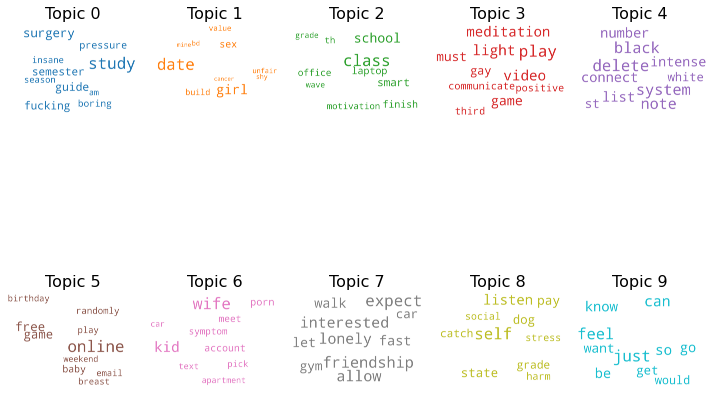

In [69]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2,5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [67]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.156244 -0.444502       1        1  81.891944
6      0.120820 -0.318357       2        1   3.515133
5     -0.360684 -0.088831       3        1   3.258674
10    -0.202325  0.329521       4        1   1.752049
9      0.298857 -0.140541       5        1   1.621709
4      0.198227 -0.026453       6        1   1.512579
11     0.027578  0.287710       7        1   1.148991
3     -0.109396 -0.107811       8        1   1.131164
1     -0.215392  0.109237       9        1   1.124367
0      0.154522  0.213790      10        1   1.083525
8      0.265898  0.121651      11        1   1.066172
7     -0.021861  0.064587      12        1   0.893694, topic_info=         Term        Freq       Total Category  logprob  loglift
483    school  190.000000  190.000000  Default  30.0000  30.0000
426       job  158.000000  158.000000  Default  29.0000  29.0000
300       kid  128.000000  128.000000  Default  28.0000  28.0000
795      girl  110.000000  110.000000  Default  27.0000  27.0000
500      call  174.000000  174.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1264  history    5.543335   13.570463  Topic12  -4.9555   3.8223
459   fucking   11.195713   93.765148  Topic12  -4.2525   2.5923
961    weight    5.891887   19.074181  Topic12  -4.8945   3.5428
3110     deny    4.912057   14.508405  Topic12  -5.0764   3.6345
18        die    4.471751   90.553038  Topic12  -5.1703   1.7094

[507 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
772       7  0.936621    absolute
190       1  0.948216       abuse
190       8  0.049906       abuse
4288      9  0.916935  acceptable
1165      4  0.951014     account
...     ...       ...         ...
158       1  0.998384       would
158       3  0.001347       would
4783     11  0.735102        wrap
159       1  0.998562        year
3795      7  0.825473     youtube

[594 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 6, 11, 10, 5, 12, 4, 2, 1, 9, 8])

In [47]:
print(pd.__version__)

1.1.5


In [ ]:
!pip install pandas==1.3.1

BERT

In [ ]:
!pip install bertopic[visualization] --quiet

In [11]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [ ]:
model = BERTopic(language='english',nr_topics=10)
topics, probs = model.fit_transform(data)
model.get_topic(0)

In [37]:
model.get_topic_info()
# model.visualize_topics()

,Topic,Count,Name
0,1,1370,1_and_to_the_my
1,0,104,0_thats_curious_2020_yeah


In [41]:
data[10]

'Work on the road. Rarely home. \n\nWas home over the holidays and my wife saw a young man (high school to college aged) let his dog shit on my lawn and not clean it up. \n\nI ran outside and screamed at him as he walked away. No response. \n\nI scooped up the dog shit in my bare hand, chased him down, grabbed him by the collar and smeared the shit on his face and in his mouth. \n\nI then saw that he had headphones on and had not heard me screaming at him. \n\n\nI have been fantasizing for years about physically “disciplining” someone that I caught trying to break into my car or garage. This was one of those moments come to life. It feels fucking horrible. \n\nI could have caught up to him and asked him to clean it up. Even provided him a baggy that we have just inside our back door and even let him throw it away in our garbage bin. \n\nFuck, I could have even just put the shit on his pants or shirt. Not his mouth.'